In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import bemcs

# Calculating the average slip over an element
The goal is estimate the average slip on a fault segment given the quadratic weights at each fo the trhee nodes.

## Basic slip functions over each element
For a single element $\mathrm{a}$ the element slip is defined by,

$
\begin{equation}
    y(x) = \sum_{i=1}^3 \phi_i f_i(x)
\end{equation}
$

Assuming a single element centered at zero the individual functions are,

$f_1(x) = \frac{x}{a} (\frac{9x}{8a} - \frac{3}{4}) = \frac{9x^2}{8a^2} - \frac{3x}{4a}$

$f_2(x) = (1 - \frac{3x}{2a})  (1 + \frac{3x}{2a}) = 1 - \frac{9x^2}{4a^2}$

$f_3(x) = \frac{x}{a} (\frac{9x}{8a} + \frac{3}{4}) = \frac{9x^2}{8a^2} + \frac{3x}{4a}$

To get the average slip over the element we need integrate the total slip, 
$
\begin{equation}
    \bar{y}(x) = \frac{1}{2a} \sum_{i=1}^3 \phi_i \int_{-a}^{a} f_i(x)dx
\end{equation}
$

For each of the quadratic slip functions on this element we can integrate:

$f_1(x) = \int_{-a}^{a} \left(\frac{9x^2}{8a^2} - \frac{3x}{4a} \right)dx = \frac{3a}{4}$

$f_2(x) = \int_{-a}^{a} \left( 1 - \frac{9x^2}{4a^2} \right)dx = \frac{a}{2}$

$f_3(x) = \int_{-a}^{a} \left(\frac{9x^2}{8a^2} + \frac{3x}{4a} \right)dx = \frac{3a}{4}$

Now we can write the average slip as:
$
\begin{equation}
    \bar{y} = \frac{1}{2a} \left( \phi_1 \frac{3a}{4} + \phi_2 \frac{a}{2} + \phi_3 \frac{3a}{4} \right) = \phi_1 \frac{3}{8}  +  \phi_2 \frac{1}{4} + \phi_3 \frac{3}{8}
\end{equation}
$

and in matrix form:

$
\begin{equation}
    \bar{y}
    =
    \begin{bmatrix}
        \frac{3}{8} & \frac{1}{4} & \frac{3}{8}
    \end{bmatrix}
    \begin{bmatrix}
        \phi_1\\
        \phi_2\\
        \phi_3
   \end{bmatrix}
\end{equation}
$



# Plot slip across an elements and it's average.
# The analytic results are too small by a factor of 2.  Whaa?
# Is there some mistake with the definition of $a$ as an element half-width?

[0.62286115 0.55926914 0.23598634]


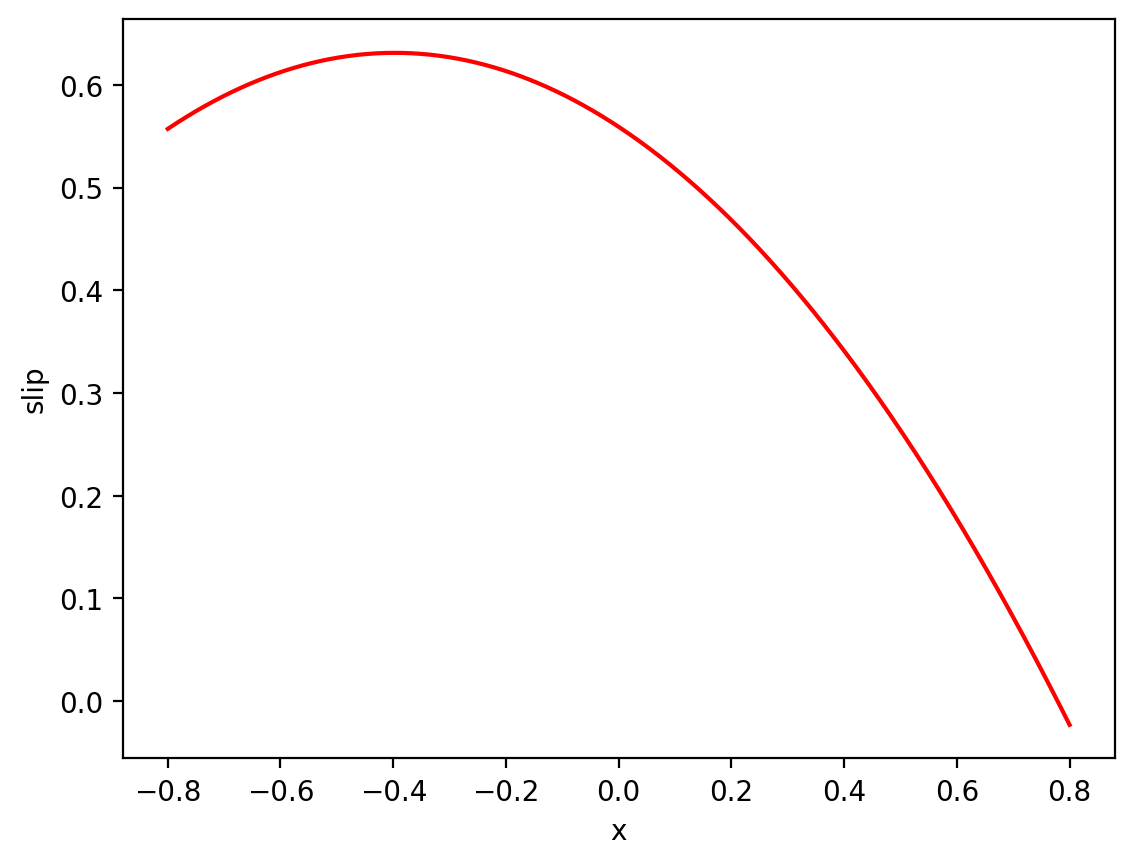

numeric_integral=0.46188
analytic_integral=0.46189


In [9]:
# Slip functions
def f_1(x, a):
    return (x / a) * (9 * (x / a) / 8 - 3 / 4)


def f_2(x, a):
    return 1 - (9 * x**2) / (4 * a**2)


def f_3(x, a):
    return (x / a) * (9 * (x / a) / 8 + 3 / 4)


# compute slip from 3qn coefficients
def get_slip(x, a, phi_1, phi_2, phi_3):
    return phi_1 * f_1(x, a) + phi_2 * f_2(x, a) + phi_3 * f_3(x, a)


n_pts = 1001
a = 0.8 # half-width of fault
x = np.linspace(-a, a, n_pts)

# quadratic_weights = np.array([0, 1, 0])
# quadratic_weights = np.array([1, 0, 0])
# quadratic_weights = np.array([1, 0, 1])
quadratic_weights = np.random.rand(3)
print(quadratic_weights)

x_centroid = 0
slip = get_slip(
    x - x_centroid,
    a,
    quadratic_weights[0],
    quadratic_weights[1],
    quadratic_weights[2],
)

plt.figure()
plt.plot(x, slip, "-r", label="slip")
plt.xlabel("x")
plt.ylabel("slip")
plt.show()

# Calculate integrals
numeric_integral = np.trapz(slip, x) / 2 / a
analytic_integral = np.array([3.0 / 8.0, 1.0 / 4.0, 3.0 / 8.0]) @ quadratic_weights
print(f"{numeric_integral=:0.5f}")
print(f"{analytic_integral=:0.5f}")
# print(f"{2 * analytic_integral=:0.5f}")
